In [48]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import pymeshlab as mlab
from src.pytetgen import read_tetgen,call_tetgen
from get_mesh_stats import find_mesh_quality


dir ='../NeuronSet2/Selected_Cells/surface_meshes'
dir ='../NeuronSet2/Random_Cells/surface_meshes2'

# file='../NeuronSet2/Selected_Cells/surface_meshes/20171005A01.CNG.ply'

log_file = f'{dir}/mesh_stats.db'

conn = sqlite3.connect(log_file)
data = pd.read_sql_query('SELECT * FROM meshing_stats',conn)


In [50]:
old_quality = data.mesh_quality
new_quality = []

In [51]:
tetgen_time = []
import time
for name in list(data.morphology):
    file = f'{dir}/{name}.ply'
    start = time.time()
    call_tetgen(file,"-pq1.2a1.0O9/7VC")
    tetgen_time.append(time.time() -start)
    tet_file = file.replace('.ply','.1')
    q = find_mesh_quality(tet_file)
    new_quality.append(q)


c:\Users\amcsween\Documents\GitHub\alphaSwc\src/tetgen/win64/tetgen -pq1.2a1.0O9/7VC ../NeuronSet2/Random_Cells/surface_meshes2/PVN27_microglia28.CNG.ply
Opening ../NeuronSet2/Random_Cells/surface_meshes2/PVN27_microglia28.CNG.ply.
  Initializing memorypools.
  tetrahedron per block: 8188.
  Size of a point: 144 bytes.
  Size of a tetrahedron: 96 (96) bytes.
  Size of a shellface: 200 (200) bytes.
  Initializing robust predicates.
  sizeof(double) =  8
  machine epsilon =  2.22045e-016 [IEEE 754 64-bit macheps]
Delaunizing vertices...
  Permuting vertices.
  Sorting vertices.
  Incrementally inserting vertices.
Delaunay seconds:  0.021
  Point sorting seconds:  0.001
Creating surface mesh ...
  18976 (27349) subfaces (segments).
Surface mesh seconds:  0.023
Constrained Delaunay...
  Creating the segment-endpoints map.
  Found 27349 segments.
  Creating the facet vertices map.
  Found 17861 facets.
  Delaunizing segments.
  Inserted 2016 Steiner points.
  Constraining facets.
  Remeshed

In [52]:
len(new_quality)

50

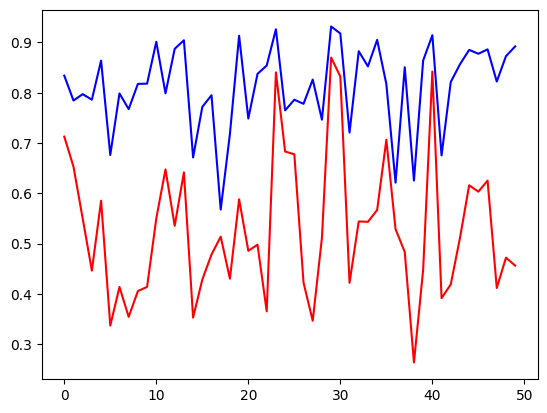

In [54]:
fig = plt.figure()

plt.plot(old_quality,'r')
plt.plot(new_quality,'b')
plt.show()


In [55]:
data.mesh_quality = new_quality
data.tetgen = tetgen_time

data.to_sql('meshing_stats',conn,index=False,if_exists='replace')

50

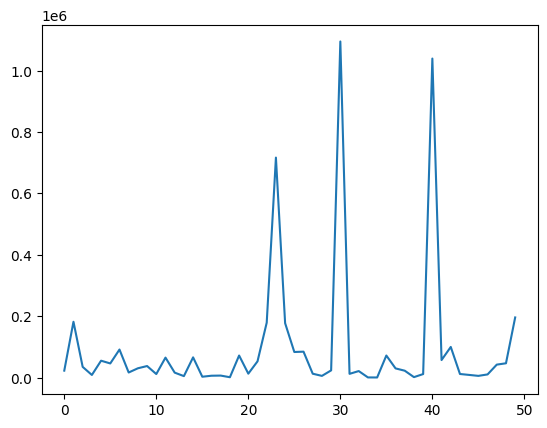

In [56]:
mesh_size = []
for name in list(data.morphology):
    tet_file = f'{dir}/{name}.1'
    nodes,_ = read_tetgen(tet_file)
    new_quality.append(q)
    mesh_size.append(len(nodes))

fig =plt.figure()
plt.plot(mesh_size)
plt.show()

In [60]:
mesh_sizes_data = {'morphology': list(data.morphology),'mesh_size':mesh_size}

In [61]:
conn = sqlite3.connect(log_file)
mesh_sizes_data = pd.DataFrame(mesh_sizes_data)
mesh_sizes_data.to_sql('femesh_stats',conn,if_exists="replace",index=False)

50